In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader, TensorDataset

/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype = torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=.8)
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.tensors[0].shape[0], shuffle=True)

In [4]:
for X,y in train_loader:
    print(X.shape, y.shape)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


In [5]:
def create_model():
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )

    lossfun = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)
    
    return ANNiris, lossfun, optimizer

In [6]:
num_epochs = 500

def train_model():
    
    train_acc = []
    test_acc = []
    losses = []
    
    for epoch in range(num_epochs):
        
        batch_acc = []
        batch_loss = []
        
        for X,y in train_loader:
        
            yHat = ANNiris(X)

            loss = lossfun(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            batch_loss.append(loss.detach())
            batch_acc.append(100*torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())
            
        train_acc.append(np.mean(batch_acc))
        losses.append(np.mean(batch_loss))
        
        X,y = next(iter(test_loader))
        
        predlabels = torch.argmax(ANNiris(X), axis=1)
        test_acc.append(100*torch.mean((predlabels == y).float()).item())
        
    return train_acc, test_acc, losses

In [7]:
ANNiris, lossfun, optimizer = create_model()

train_acc, test_acc, losses = train_model()

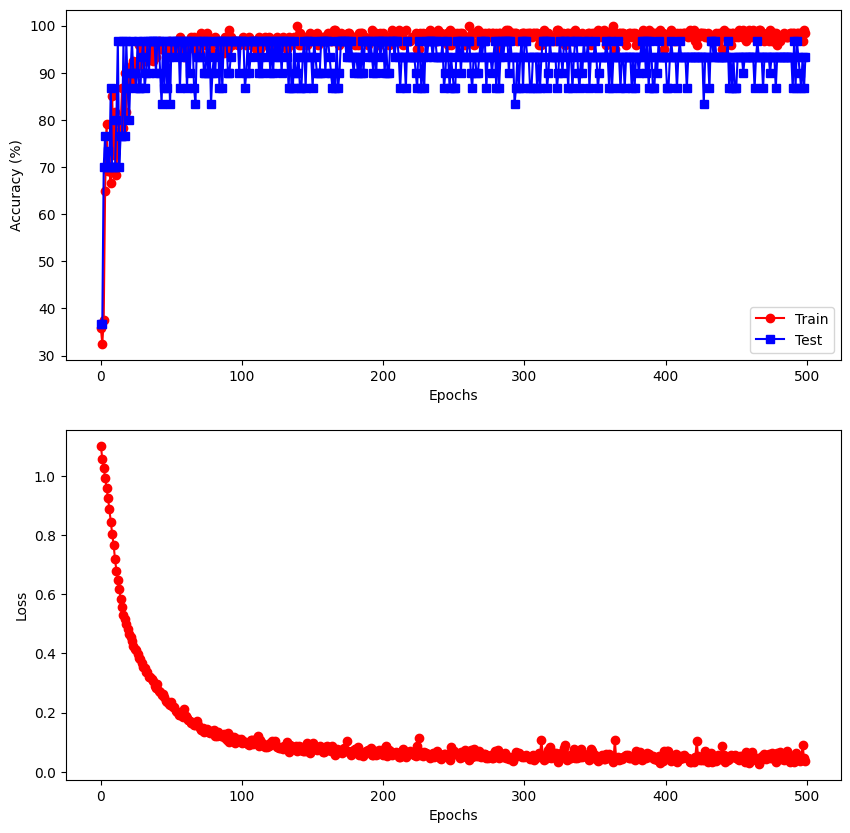

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(train_acc, 'ro-')
ax[0].plot(test_acc, 'bs-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend(['Train', 'Test'])

ax[1].plot(losses, 'ro-')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
plt.show()